# SUPERSTORE SALES - EXPLORATORY DATA ANALYSIS

---

By : Ni Made Yuli Cahyani

This project used to gain a better understanding and discover the meaningful insights in the superstore sales data

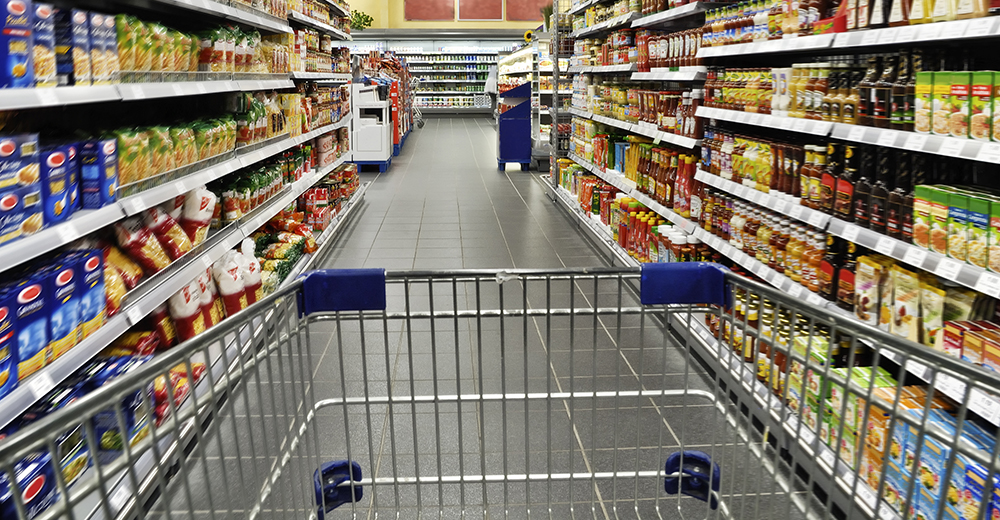

The dataset that used in this project is SampleSuperstore Dataset. This dataset contain information about sales from Superstore.

  | About                   | Description                                                                              |
  | ----------------------- | --------------------------------------------------------------------------------------- |
  | Source                  | SampleSuperstore Dataset : [Kaggle](https://www.kaggle.com/datasets/ishaanthareja007/samplesuperstore) |
  | Dataset Owner           | Ishaan Thareja                                                                           |
  | Lisensi                 | CC0: Public Domain                                                                                |
  | Category                | Business, Tabular Data, Exploratory Data Analysis, Intermediate, Python                          |
  | Usability       | 7.94 (Gold)                                                                            |
  | File type and size | CSV (1.11 MB)   

# Import Libraries

In [1]:
!pip install opendatasets --quiet

In [2]:
import opendatasets as od
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Download Dataset

In [3]:
download_url = 'https://www.kaggle.com/datasets/ishaanthareja007/samplesuperstore'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: yulicahyani
Your Kaggle Key: ··········


100%|██████████| 164k/164k [00:00<00:00, 26.9MB/s]

# Data Preparation and Cleaning
1. Load the data
2. Look at some information about the data and columns
3. fix any missing or incorrect values

In [5]:
data_filename = "/content/samplesuperstore/SampleSuperstore.csv"
df = pd.read_csv(data_filename)

In [ ]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9993 non-null   object 
 1   Segment       9993 non-null   object 
 2   Country       9993 non-null   object 
 3   City          9993 non-null   object 
 4   State         9993 non-null   object 
 5   Postal Code   9993 non-null   int64  
 6   Region        9993 non-null   object 
 7   Category      9993 non-null   object 
 8   Sub-Category  9993 non-null   object 
 9   Sales         9993 non-null   float64
 10  Quantity      9993 non-null   int64  
 11  Discount      9993 non-null   float64
 12  Profit        9993 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.0+ KB


In [ ]:
numeric_columns = df.select_dtypes('number').columns.tolist()
categorical_columns = df.select_dtypes('object').columns.tolist()

print("Numerical")
print(len(numeric_columns))
print(numeric_columns)

print("-----------------------")

print("Categorical")
print(len(categorical_columns))
print(categorical_columns)

Numerical
5
['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']
-----------------------
Categorical
8
['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']


In [ ]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,55186.627539,229.856670,3.789753,0.156218,28.652464
std,32063.103801,623.276273,2.225149,0.206456,234.271411
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728000
50%,56301.000000,54.480000,3.000000,0.200000,8.662000
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Min Sales : 0.444, Max Sales : 22638.48 <br>
Min Profit : -6599.978, Max profit : 8399.976

In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

There is no missing values in each column

In [ ]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5824
Quantity          14
Discount          12
Profit          7286
dtype: int64

In [ ]:
df.Country.unique()

array(['United States'], dtype=object)

The data just contain information about Superstore sales in Country United State

In [ ]:
# Remove the columns that we dont use 
df.drop(["Country", "Postal Code"], axis=1, inplace=True)

In [ ]:
df.duplicated().sum()

50

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
len(df)

9943

In [ ]:
df.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

# Exploratory Analysis and Visualization

In [ ]:
# Total Sales:
print("Total sales are {}".format(df["Sales"].sum()))

# Total Profit:
print("Total profit is {}".format(df["Profit"].sum()))

Total sales are 2294356.2172999997
Total profit is 286024.6099


## Ship Mode
We wil find out which ship mode has the highest/lowest sales and profit

In [ ]:
ship_mode = df['Ship Mode'].value_counts()
ship_mode

Standard Class    5930
Second Class      1940
First Class       1531
Same Day           542
Name: Ship Mode, dtype: int64

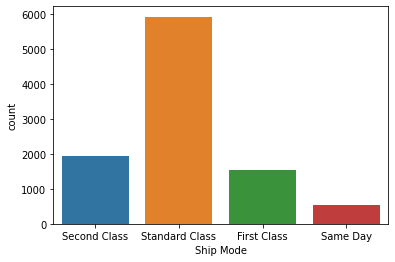

In [ ]:
sns.countplot(x=df["Ship Mode"])

The most opted ship mode : Standard Class <br>
The least opted ship mode : Same Day

In [ ]:
sales_and_profit_by_ship_mode = df.groupby('Ship Mode')[['Sales','Profit']].sum()
sales_and_profit_by_ship_mode

,Sales,Profit
Ship Mode,,
First Class,3.512746e+05,48910.4477
Same Day,1.283217e+05,15871.8869
Second Class,4.588809e+05,57352.6236
Standard Class,1.355879e+06,163889.6517


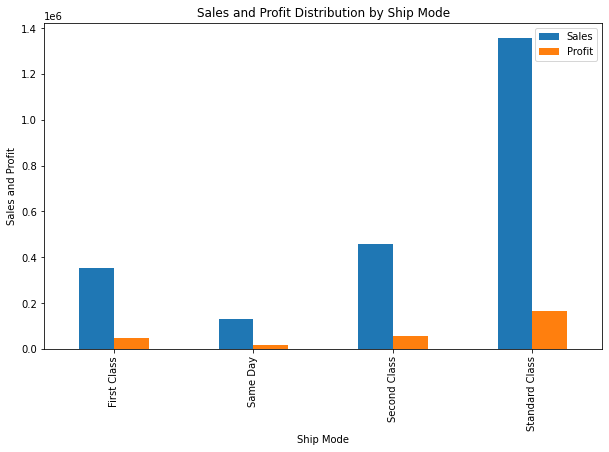

In [ ]:
sales_and_profit_by_ship_mode.plot(kind="bar", figsize=(10,6))
plt.title("Sales and Profit Distribution by Ship Mode")
plt.ylabel("Sales and Profit")
plt.show()

The ship mode that has highest Sales and Profit : Standard Class <br> 
The ship mode that has lowest Sales and Profit : Same Day

## Segment
We wil find out which Segment has the highest/lowest sales and profit

In [ ]:
segment = df['Segment'].value_counts()
segment

Consumer       5159
Corporate      3008
Home Office    1776
Name: Segment, dtype: int64

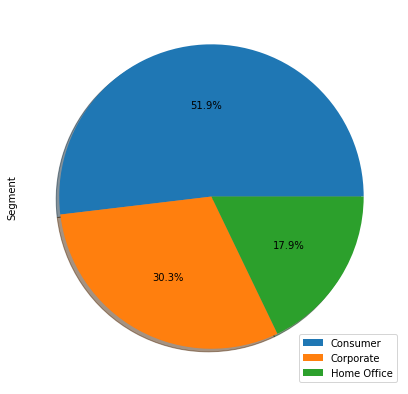

In [ ]:
segment.plot(kind="pie",figsize=(7,7),autopct="%1.1f%%",
         shadow=True,labels=None)
plt.legend(labels=segment.index,loc="best")
plt.show()

Business distribution is most in Consumer segment and least in Home Office segment

In [ ]:
df.groupby('Segment')[['Sales','Profit']].sum()

,Sales,Profit
Segment,,
Consumer,1.159174e+06,133866.5738
Corporate,7.059702e+05,91911.1606
Home Office,4.292117e+05,60246.8755


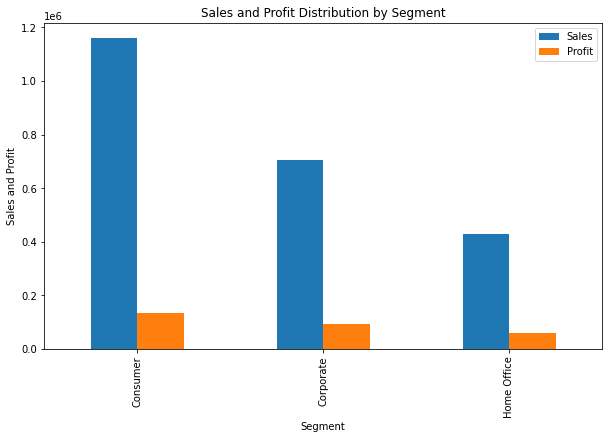

In [ ]:
df.groupby('Segment')[['Sales','Profit']].sum().plot(kind="bar", figsize=(10,6))
plt.title("Sales and Profit Distribution by Segment")
plt.ylabel("Sales and Profit")
plt.xlabel("Segment")
plt.show()

Segment that has the highest Sales and Profit : Cunsumer <br>
Segment that has the lowest Sales and Profit : Home Office

## Category and Sub-Category
- We will find out which Category generates the highest sales and profit
- We will find out which Sub-Category generates the highest sales and profit

### Category

In [ ]:
category = df['Category'].value_counts()
category

Office Supplies    5985
Furniture          2114
Technology         1844
Name: Category, dtype: int64

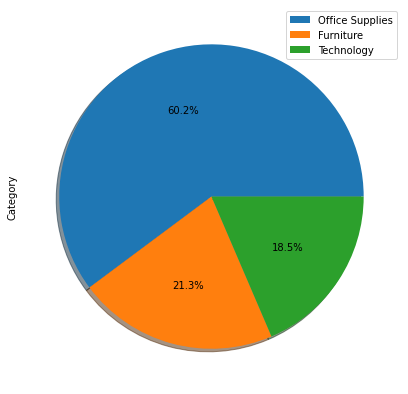

In [ ]:
category.plot(kind="pie",figsize=(7,7),autopct="%1.1f%%",
         shadow=True,labels=None)
plt.legend(labels=category.index,loc="best")
plt.show()

Business distribution is most in Office Supplies and least in Technology

In [ ]:
df.groupby('Category')[['Sales','Profit']].sum()

,Sales,Profit
Category,,
Furniture,740568.6663,18484.9459
Office Supplies,718012.9100,122123.1246
Technology,835774.6410,145416.5394


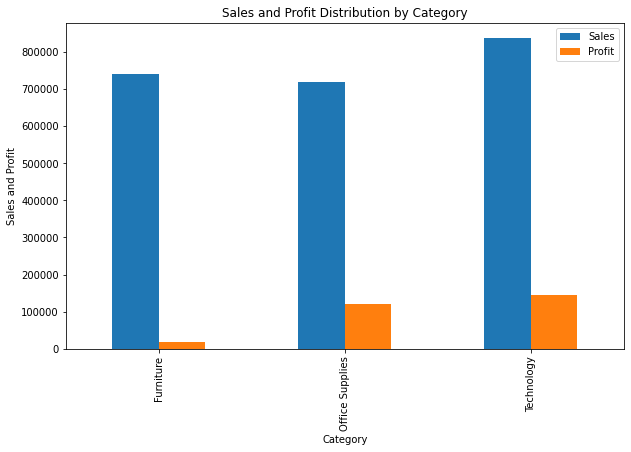

In [ ]:
df.groupby('Category')[['Sales','Profit']].sum().plot(kind="bar", figsize=(10,6))
plt.title("Sales and Profit Distribution by Category")
plt.ylabel("Sales and Profit")
plt.xlabel("Category")
plt.show()

Category that generate the highest sales and profitt : Technology <br> 
Category  that generate the lowest Sales : Office Supplies and the lowest Profit : Furniture

### Sub-Category

In [ ]:
sub_category = df['Sub-Category'].value_counts()
sub_category

Binders        1518
Paper          1344
Furnishings     954
Phones          888
Storage         845
Art             793
Accessories     773
Chairs          615
Appliances      465
Labels          359
Tables          319
Envelopes       254
Bookcases       226
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

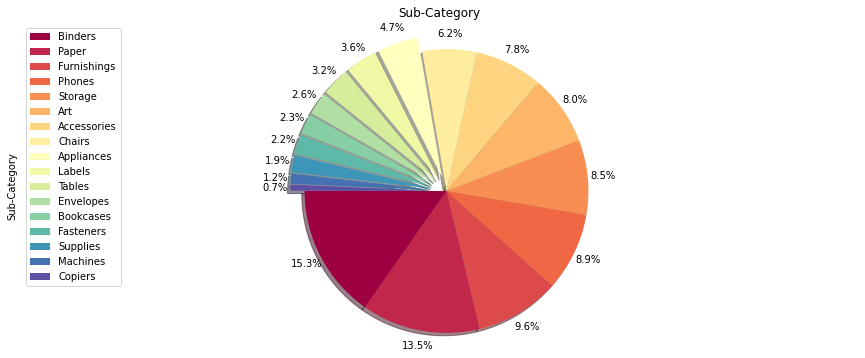

In [ ]:
from matplotlib import cm
cmap = cm.get_cmap('Spectral')
explode_list=[0,0,0,0,0,0,0,0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
sub_category.plot(kind="pie", figsize=(15,6),autopct="%1.1f%%",shadow=True,startangle=180,
                                   explode=explode_list, labels=None, pctdistance=1.11,cmap=cmap)
plt.title("Sub-Category")
plt.axis("equal")
plt.legend(labels=sub_category.index,loc="upper left")
plt.show()

Major distribution of business is in Sub-Category :  Binders, Paper and Furnishings <br>
Least distribution of business is in Sub-Category : Copiers, Machines and Supplies

In [ ]:
# Sales by Sub-Category
sales_and_profit_by_sub_category=df.groupby(["Category","Sub-Category"])[['Sales','Profit']].sum()
sales_and_profit_by_sub_category

Sales      Profit
Category        Sub-Category                         
Furniture       Bookcases     114166.9293  -3398.7542
                Chairs        327777.7610  26567.1278
                Furnishings    91658.4440  13042.0534
                Tables        206965.5320 -17725.4811
Office Supplies Appliances    107289.0010  18065.0574
                Art            27065.7320   6511.8388
                Binders       203328.8590  30205.2603
                Envelopes      16476.4020   6964.1767
                Fasteners       3024.2800    949.5182
                Labels         12385.7640   5499.1558
                Paper          77960.8940  33830.0381
                Storage       223808.4400  21287.1788
                Supplies       46673.5380  -1189.0995
Technology      Accessories   167303.3020  41920.9052
                Copiers       149528.0300  55617.8249
                Machines      189238.6310   3384.7569
                Phones        329704.6780  44493.0524

Text(0, 0.5, 'Sales')

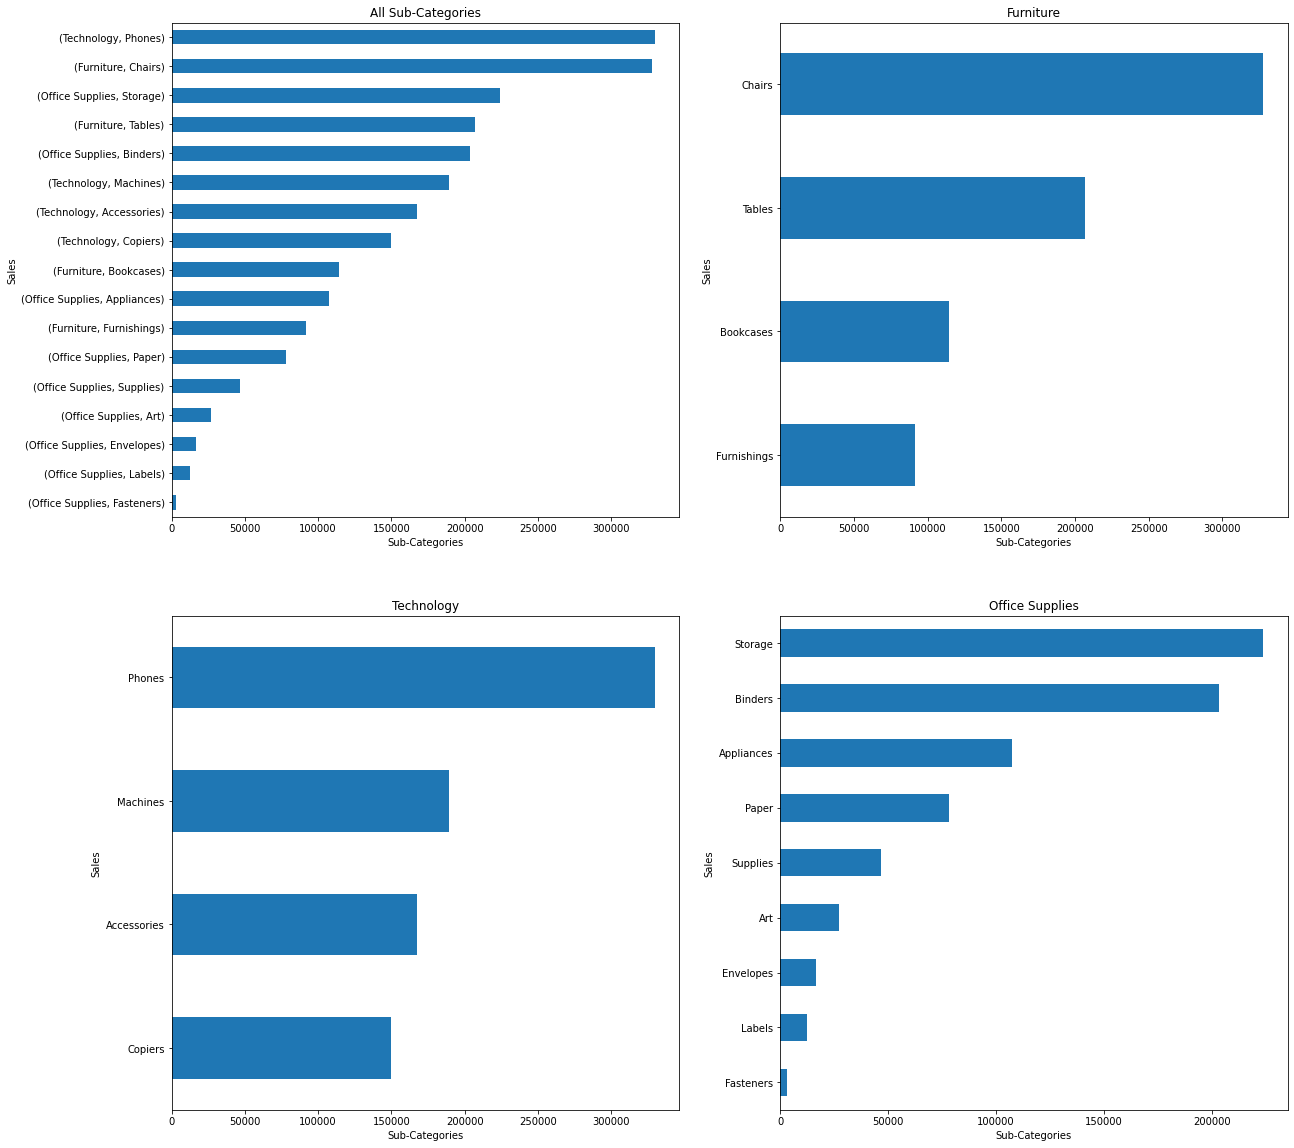

In [ ]:
#Sales
sales_by_sub = sales_and_profit_by_sub_category.Sales

fig=plt.figure()
ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

#Furniture
sales_by_sub["Furniture"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax1)
ax1.set_title("Furniture")
ax1.set_xlabel("Sub-Categories")
ax1.set_ylabel("Sales")

#Technology
sales_by_sub["Technology"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax2)
ax2.set_title("Technology")
ax2.set_xlabel("Sub-Categories")
ax2.set_ylabel("Sales")

#Office Supplies
sales_by_sub["Office Supplies"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax3)
ax3.set_title("Office Supplies")
ax3.set_xlabel("Sub-Categories")
ax3.set_ylabel("Sales")

#Total
sales_by_sub.sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax0)
ax0.set_title("All Sub-Categories")
ax0.set_xlabel("Sub-Categories")
ax0.set_ylabel("Sales")

Top 5 Sub-Category that generate the highest Sales:
- Phone (Technology)
- Chairs (Furniture)
- Storage ( Office Supplies)
- Tables (Furniture)
- Binders (Office Supplies)

5 Sub-Category that generate the lowest Sales are all in Office Supllies Category which are : Fasteners,Labels, Envelopes, Art and Supplies

The highest sales in Furniture is Chairs and the lowest is Furnishings

The highest sales in Technology is Phone and the lowest is Copiers

The highest sales in Office Supllies is Storage and the lowest is Fasteners

Text(0, 0.5, 'Profit')

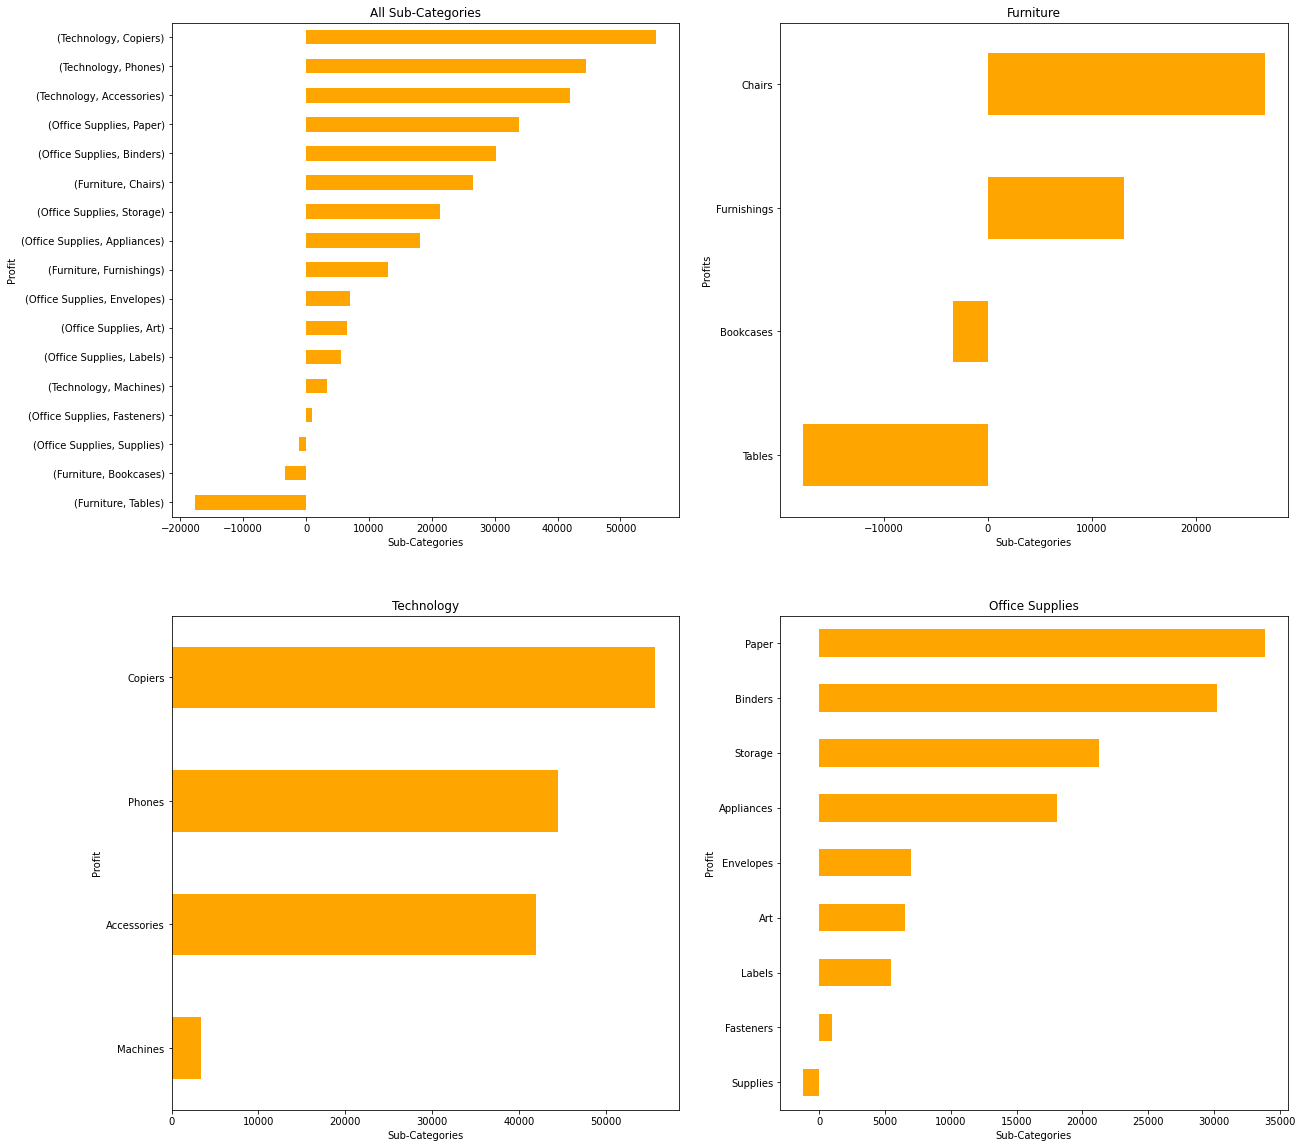

In [ ]:
#Profit
profit_by_sub = sales_and_profit_by_sub_category.Profit

fig=plt.figure()
ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

#Furniture
profit_by_sub["Furniture"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax1,color="orange")
ax1.set_title("Furniture")
ax1.set_xlabel("Sub-Categories")
ax1.set_ylabel("Profits")

#Technology
profit_by_sub["Technology"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax2,color="orange")
ax2.set_title("Technology")
ax2.set_xlabel("Sub-Categories")
ax2.set_ylabel("Profit")

#Office Supplies
profit_by_sub["Office Supplies"].sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax3,color="orange")
ax3.set_title("Office Supplies")
ax3.set_xlabel("Sub-Categories")
ax3.set_ylabel("Profit")

#Total
profit_by_sub.sort_values(ascending=True).plot(kind="barh", figsize=(20,20),ax=ax0,color="orange")
ax0.set_title("All Sub-Categories")
ax0.set_xlabel("Sub-Categories")
ax0.set_ylabel("Profit")

Top 5 Sub-Category that generate the highest Profit:
- Copiers (Technology)
- Phones (Technology)
- Accessories (Technology)
- Paper (Office Supplies)
- Binders (Office Supplies)

5 Sub-Category that generate the lowest Profit:
- Tables (Furniture)
- Bookcase (Furniture)
- Supplies (Office Supplies)
- Fasteners (Office Supplies)
- Machines (Technology)

The highest profit in Furniture is Chairs and the lowest is Tables

The highest profit in Technology is Copiers and the lowest is Machines

The highest profit in Office Supllies is Paper and the lowest is Supplies

## State and City
- We will find out which State has the highest sales and profit
- We will find out which City has the highest sales and profit

### State

In [ ]:
state = df['State'].value_counts()
state

California              1979
New York                1119
Texas                    980
Pennsylvania             581
Washington               502
Illinois                 490
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

Text(0, 0.5, 'Number of Buyers')

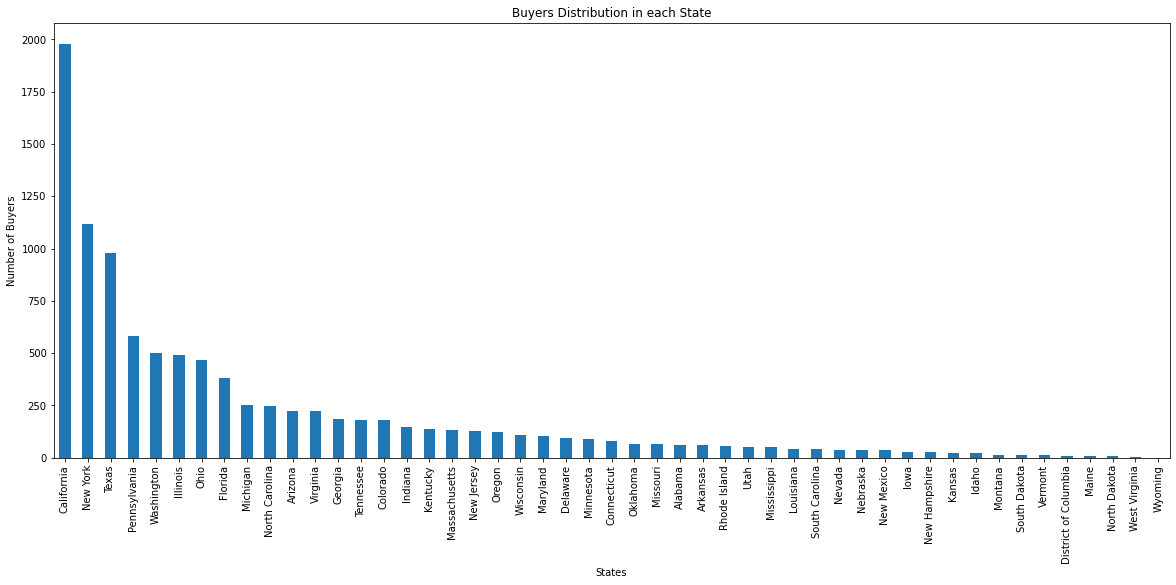

In [ ]:
state.plot(kind="bar",figsize=(20,8))
plt.title("Buyers Distribution in each State")
plt.xlabel("States")
plt.ylabel("Number of Buyers")

Most buyers are from : California, New York and Texas <br>
Least buyers are from : Wyoming, West Virginia and North Dakota

In [ ]:
sales_by_states = df.groupby(["State"]).sum().sort_values("Sales", ascending=False)
sales_by_states = sales_by_states[["Sales"]].round(2)
sales_by_states.reset_index(inplace=True)
sales_by_states

,State,Sales
0,California,456386.77
1,New York,310349.22
2,Texas,170101.13
3,Washington,138560.81
4,Pennsylvania,116383.01
5,Florida,89473.71
6,Illinois,80127.37
7,Ohio,77976.76
8,Michigan,75879.64
9,Virginia,70636.72


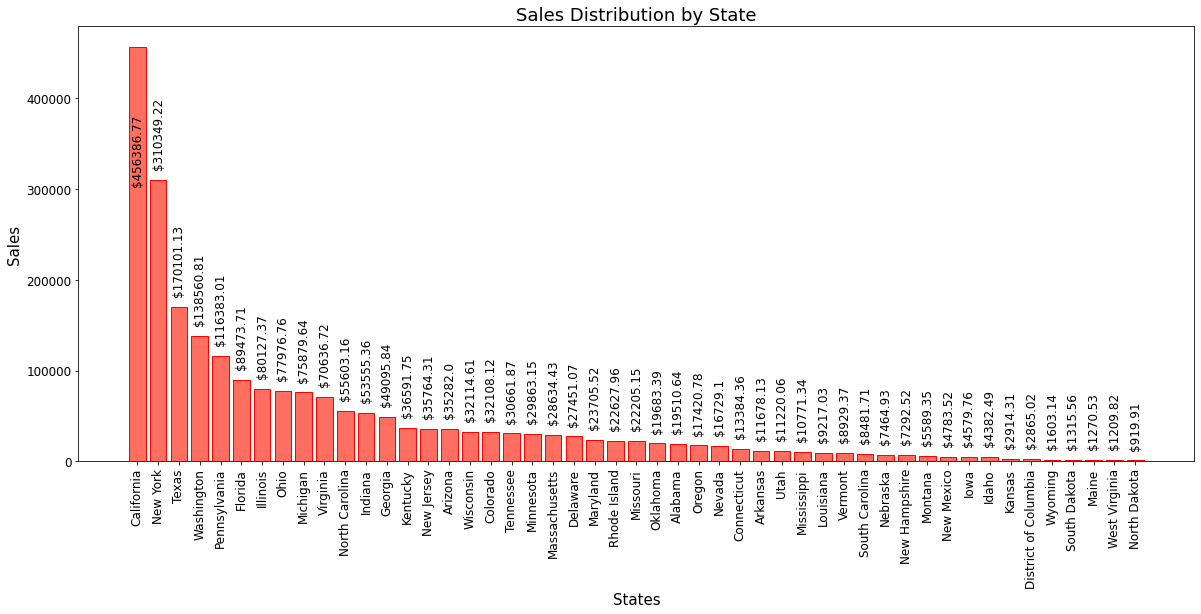

In [ ]:
plt.figure(figsize = (20,8))
plt.title("Sales Distribution by State", fontsize=18)
plt.bar(sales_by_states["State"], sales_by_states["Sales"],color= '#FF6F61',edgecolor='Red', linewidth = 1)
plt.xlabel("States",fontsize=15)
plt.ylabel("Sales",fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in sales_by_states["Sales"].items():
    if v>400000:
        plt.text(k,v-150000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v+15000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center')

Top 10 States that has highest Sales: California, New York, Texas,	Washington,Pennsylvania, Florida, Illinois, Ohio, Michigan, Virginia <br>

5 States that has lowest Sales : North Dakota, West Virginia, Maine, South Dakota, Wyoming

In [ ]:
profit_by_states = df.groupby(["State"]).sum().sort_values("Profit", ascending=False)
profit_by_states = profit_by_states[["Profit"]].round(2)
profit_by_states.reset_index(inplace=True)
profit_by_states

,State,Profit
0,California,76143.02
1,New York,74006.16
2,Washington,33368.24
3,Michigan,24428.09
4,Virginia,18597.95
5,Indiana,18382.94
6,Georgia,16250.04
7,Kentucky,11199.70
8,Minnesota,10823.19
9,Delaware,9977.37


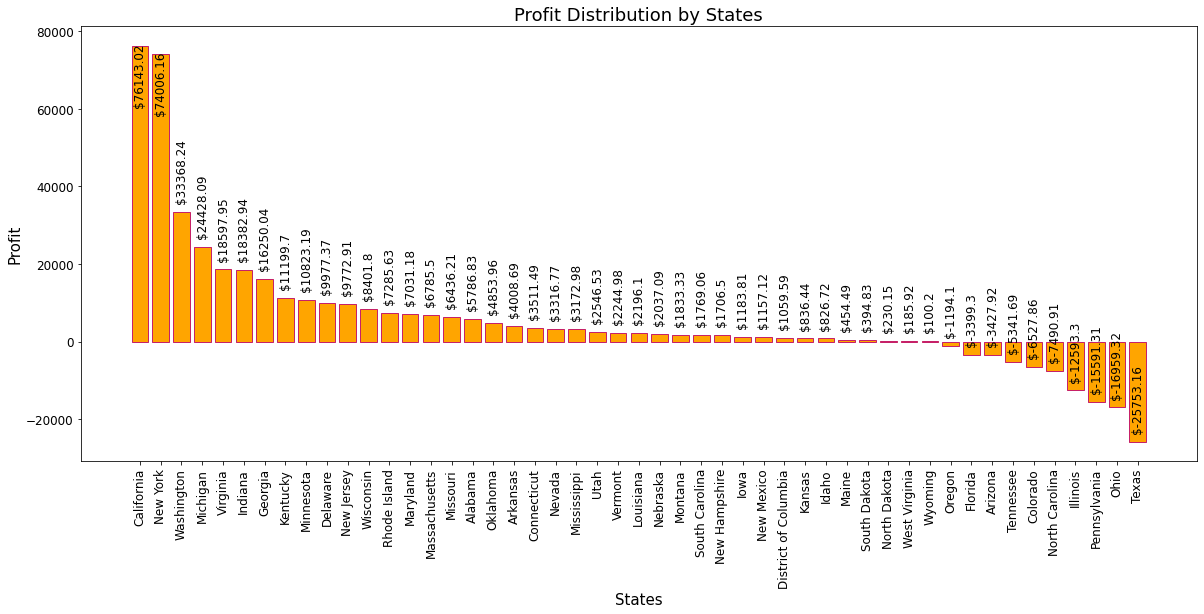

In [ ]:
plt.figure(figsize = (20,8))
plt.title("Profit Distribution by States", fontsize=18)
plt.bar(profit_by_states["State"], profit_by_states["Profit"],color= 'Orange',edgecolor='#C62168', linewidth = 1)
plt.xlabel("States",fontsize=15)
plt.ylabel("Profit",fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in profit_by_states["Profit"].items():
    if v>40000:
        plt.text(k,v-15000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v+3000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center')

Top 10 States that has highest Profit: California, New York, Washington,	Michigan,Virginia, Indiana, Georgia, Kentucky, Minnesota, Delaware <br>

5 States that has lowest Profit : Texas, Ohio, Pennsylvania, Illinois, North Carolina

In [ ]:
df[df['State']=='Texas']

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
14,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
34,Second Class,Home Office,Houston,Texas,Central,Office Supplies,Paper,29.4720,3,0.20,9.9468
35,First Class,Corporate,Richardson,Texas,Central,Technology,Phones,1097.5440,7,0.20,123.4737
36,First Class,Corporate,Richardson,Texas,Central,Furniture,Furnishings,190.9200,5,0.60,-147.9630
...,...,...,...,...,...,...,...,...,...,...,...
9919,Standard Class,Corporate,Bryan,Texas,Central,Furniture,Chairs,528.4300,5,0.30,-143.4310
9920,Standard Class,Corporate,Bryan,Texas,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176
9961,First Class,Home Office,Houston,Texas,Central,Office Supplies,Paper,65.5840,2,0.20,23.7742
9962,First Class,Home Office,Houston,Texas,Central,Furniture,Bookcases,383.4656,4,0.32,-67.6704


Texas has the third highest Sales but has the lowest Profit, this is because most product in Texas has high Discount

### City

In [ ]:
city = df['City'].value_counts()
city

New York City      906
Los Angeles        734
Philadelphia       531
San Francisco      503
Seattle            424
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64

In [ ]:
top_sales_by_city = df.groupby(["City"]).sum().sort_values("Sales", ascending=False).head(10)
top_sales_by_city = top_sales_by_city[["Sales"]].round(2)
top_sales_by_city.reset_index(inplace=True)
top_sales_by_city

,City,Sales
0,New York City,255841.10
1,Los Angeles,175296.82
2,Seattle,119460.28
3,San Francisco,112184.81
4,Philadelphia,108948.11
5,Houston,64422.77
6,Chicago,48500.81
7,San Diego,47502.13
8,Jacksonville,44713.18
9,Springfield,43054.34


In [ ]:
bottom_sales_by_city = df.groupby(["City"]).sum().sort_values("Sales", ascending=True).head(10)
bottom_sales_by_city = bottom_sales_by_city[["Sales"]].round(2)
bottom_sales_by_city.reset_index(inplace=True)
bottom_sales_by_city

,City,Sales
0,Abilene,1.39
1,Elyria,1.82
2,Jupiter,2.06
3,Pensacola,2.21
4,Ormond Beach,2.81
5,San Luis Obispo,3.62
6,Springdale,4.30
7,Layton,4.96
8,Keller,6.00
9,Missouri City,6.37


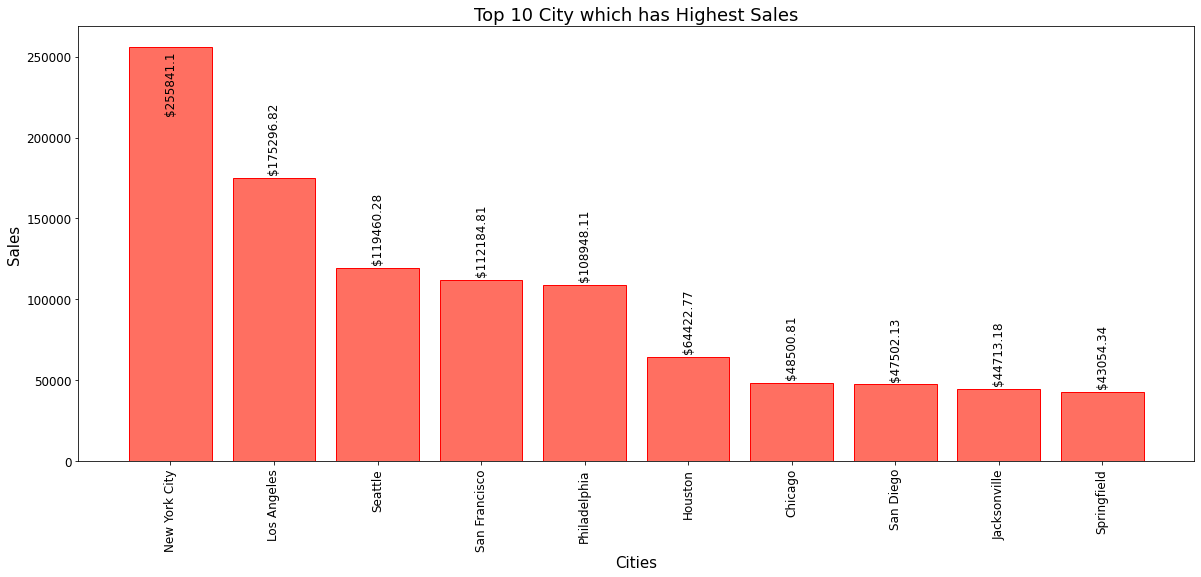

In [ ]:
plt.figure(figsize = (20,8))
plt.title("Top 10 City which has Highest Sales", fontsize=18)
plt.bar(top_sales_by_city["City"], top_sales_by_city["Sales"],color= '#FF6F61',edgecolor='red', linewidth = 1)
plt.xlabel("Cities",fontsize=15)
plt.ylabel("Sales",fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in top_sales_by_city["Sales"].items():
    if v>200000:
        plt.text(k,v-40000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v+4000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center')

Top 10 Cities that has highest Sales: New York City, Los Angeles, Seattle,	San Francisco,Philadelphia, Houston, Chicago, San Diego, Jacksonville, Springfield <br>

In [ ]:
top_profit_by_city = df.groupby(["City"]).sum().sort_values("Profit", ascending=False).head(10)
top_profit_by_city = top_profit_by_city[["Profit"]].round(2)
top_profit_by_city.reset_index(inplace=True)
top_profit_by_city

,City,Profit
0,New York City,62004.59
1,Los Angeles,30308.48
2,Seattle,29121.68
3,San Francisco,17482.94
4,Detroit,13146.69
5,Lafayette,10018.39
6,Jackson,7581.68
7,Atlanta,6993.66
8,Minneapolis,6824.58
9,San Diego,6368.50


In [ ]:
bottom_profit_by_city = df.groupby(["City"]).sum().sort_values("Profit", ascending=True).head(10)
bottom_profit_by_city = bottom_profit_by_city[["Profit"]].round(2)
bottom_profit_by_city.reset_index(inplace=True)
bottom_profit_by_city

,City,Profit
0,Philadelphia,-13869.12
1,Houston,-10175.63
2,San Antonio,-7299.05
3,Lancaster,-7239.07
4,Chicago,-6639.98
5,Burlington,-3622.88
6,Dallas,-2848.25
7,Phoenix,-2790.88
8,Aurora,-2691.74
9,Jacksonville,-2323.84


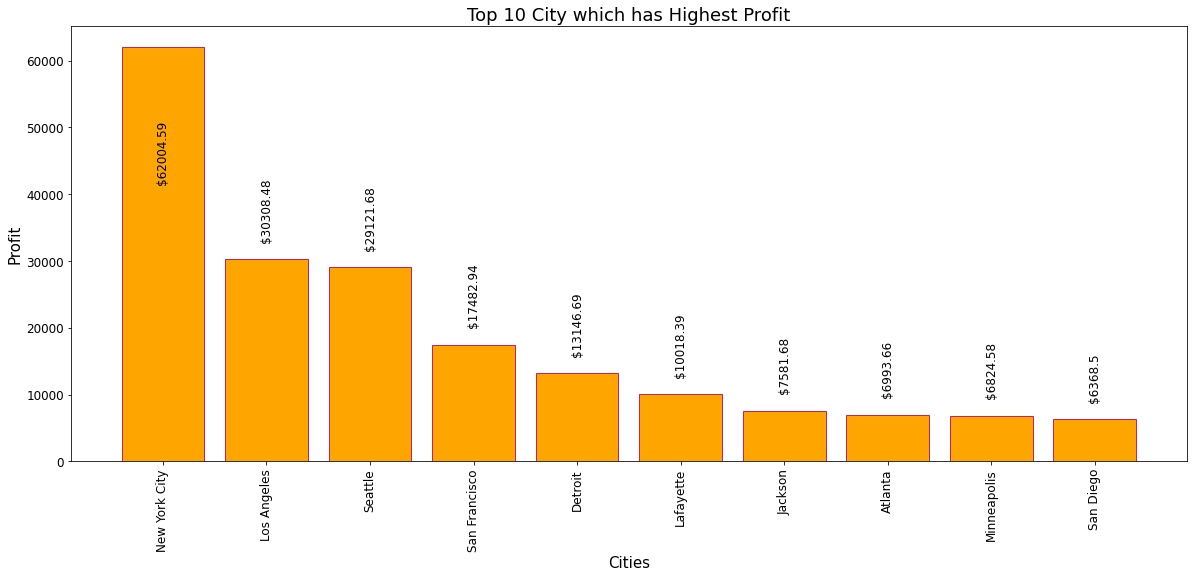

In [ ]:
plt.figure(figsize = (20,8))
plt.title("Top 10 City which has Highest Profit", fontsize=18)
plt.bar(top_profit_by_city["City"], top_profit_by_city["Profit"],color= 'Orange',edgecolor='#C62168', linewidth = 1)
plt.xlabel("Cities",fontsize=15)
plt.ylabel("Profit",fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in top_profit_by_city["Profit"].items():
    if v>40000:
        plt.text(k,v-20000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center');
    else:
        plt.text(k,v+3000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center')

Top 10 Cities that has highest Profit: New York City, Los Angeles, Seattle,	San Francisco, Detroit, Lafayette, Jackson, Atlanta, Minneapolis, San Diego <br>


## Region
We will find out which Region has highest Sales and Profit

In [ ]:
region = df['Region'].value_counts()
region

West       3176
East       2832
Central    2315
South      1620
Name: Region, dtype: int64

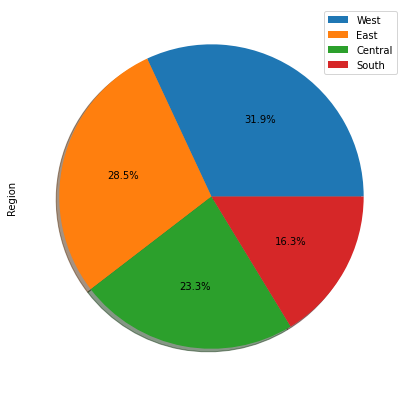

In [ ]:
region.plot(kind="pie",figsize=(7,7),autopct="%1.1f%%",
         shadow=True,labels=None)
plt.legend(labels=region.index,loc="upper right")
plt.show()

Company deals majorly in West Region and least in South Region

In [ ]:
df.groupby("Region")[["Sales","Profit"]].sum()

,Sales,Profit
Region,,
Central,500724.2708,39662.0474
East,677843.9080,91471.0909
South,391721.9050,46749.4303
West,724066.1335,108142.0413


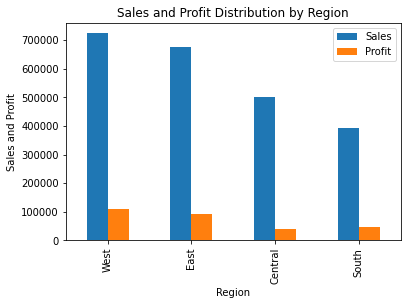

In [ ]:
df.groupby("Region")[["Sales","Profit"]].sum().sort_values(by=["Sales","Profit"],ascending=False).plot(kind="bar")
plt.ylabel("Sales and Profit")
plt.xlabel("Region")
plt.title("Sales and Profit Distribution by Region")
plt.show()

Region that has highest Sales and Profit : West region<br>
Region that has lowest Sales and Profit : South region

## Relation between Sales, Discount, Profit

In [ ]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200477,-0.028624,0.479078
Quantity,0.200477,1.000000,0.008246,0.066107
Discount,-0.028624,0.008246,1.000000,-0.219931
Profit,0.479078,0.066107,-0.219931,1.000000


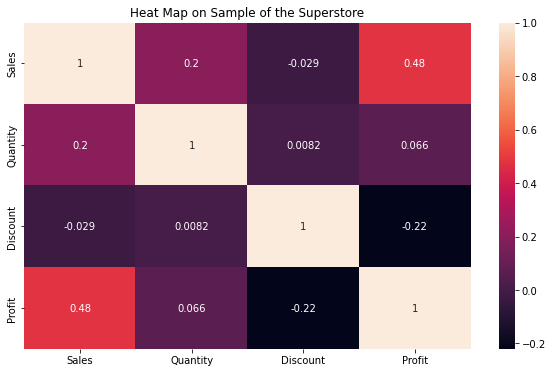

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.title("Heat Map on Sample of the Superstore")
plt.show()

As Discount increases Profit decreases<br>
As Discount increases Sales decrease<br>
As Sales increase Profit increases

# Observations

### Ship Mode
- The most opted ship mode : Standard Class
- The least opted ship mode : Same Day
- The ship mode that has highest Sales and Profit : Standard Class 
- The ship mode that has lowest Sales and Profit : Same Day

### Segment
- Business distribution is most in Consumer segment and least in Home Office segment
- Segment that has the highest Sales and Profit : Cunsumer
- Segment that has the lowest Sales and Profit : Home Office

### Category and Sub-Category
- Business distribution is most in Office Supplies and least in Technology
- Category that generate the highest sales and profitt : Technology
- Category  that generate the lowest Sales : Office Supplies and the lowest Profit : Furniture
- Major distribution of business is in Sub-Category :  Binders, Paper and Furnishings
- Least distribution of business is in Sub-Category : Copiers, Machines and Supplies
- Top 5 Sub-Category that generate the highest Sales:
  - Phone (Technology)
  - Chairs (Furniture)
  - Storage ( Office Supplies)
  - Tables (Furniture)
  - Binders (Office Supplies)
- 5 Sub-Category that generate the lowest Sales are all in Office Supllies Category which are : Fasteners,Labels, Envelopes, Art and Supplies
- The highest sales in Furniture is Chairs and the lowest is Furnishings
- The highest sales in Technology is Phone and the lowest is Copiers
- The highest sales in Office Supllies is Storage and the lowest is Fasteners
- Top 5 Sub-Category that generate the highest Profit:
  - Copiers (Technology)
  - Phones (Technology)
  - Accessories (Technology)
  - Paper (Office Supplies)
  - Binders (Office Supplies)
- 5 Sub-Category that generate the lowest Profit:
  - Tables (Furniture)
  - Bookcase (Furniture)
  - Supplies (Office Supplies)
  - Fasteners (Office Supplies)
  - Machines (Technology)
- The highest profit in Furniture is Chairs and the lowest is Tables
- The highest profit in Technology is Copiers and the lowest is Machines
- The highest profit in Office Supllies is Paper and the lowest is Supplies

### State and City
- Most buyers are from : California, New York and Texas
- Least buyers are from : Wyoming, West Virginia and North Dakota
- Top 10 States that has highest Sales: California, New York, Texas,	Washington,Pennsylvania, Florida, Illinois, Ohio, Michigan, Virginia <br>
- 5 States that has lowest Sales : North Dakota, West Virginia, Maine, South Dakota, Wyoming
- Top 10 States that has highest Profit: California, New York, Washington,	Michigan,Virginia, Indiana, Georgia, Kentucky, Minnesota, Delaware <br>
- 5 States that has lowest Profit : Texas, Ohio, Pennsylvania, Illinois, North Carolina
- Top 10 Cities that has highest Sales: New York City, Los Angeles, Seattle,	San Francisco,Philadelphia, Houston, Chicago, San Diego, Jacksonville, Springfield 
- Top 10 Cities that has highest Profit: New York City, Los Angeles, Seattle,	San Francisco, Detroit, Lafayette, Jackson, Atlanta, Minneapolis, San Diego

### Region
- Company deals majorly in West Region and least in South Region
- Region that has highest Sales and Profit : West region
- Region that has lowest Sales and Profit : South region

### Relation between Sales, Discount and Profit
- As Discount increases Profit decreases
- As Discount increases Sales decrease
- As Sales increase Profit increases

# Conclusion

From the results of observations, we can draw the following conclusions:
- For Ship Mode, put more focus on Standard Class as it brings highest profit and sales
- Consumer segment should be encouraged as it gives highest sales and profit
- Consider to move the major distribution of business towards Technology cause it most profitable rather than Office Supplies that least profitable
- For products that have category Technology give more focus over Copiers, Phones and Accessories which bring highest profit
- For products that have category Furniture give more focus over Chairs and Furnishings which bring highest profit
- For products that have category Office Supplies give more focus over Papers, Binders and Storage which bring highest profit
- Work to uplift sales in State that are facing losses such as Texas, Ohio, Pennsylvania, Illinois, North Carolina
- Keep focus over the state with highest buyers and highest sales and profit, that are California and New york
- West and East regions should be focussed upon for major chunk of sales and profit
- Cut on discounts to increase Profit and Sales